# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
# library import
import pandas as pd
import numpy as np
import requests
import os
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# reading a csv file into a DataFrame 
twitter_archive_enhanced_df = pd.read_csv('twitter-archive-enhanced.csv')

In [109]:
# displaying the first 5 records
twitter_archive_enhanced_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
# scraping a url for data
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [5]:
# writing the scrapped data to a file
with open(os.path.join(url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

In [6]:
# displays list of files in the current directory
os.listdir()

['twitter-archive-enhanced.csv',
 'twitter_archive_master.csv',
 'act_report.ipynb',
 'tweet_json.txt',
 'tweet-json.txt',
 'image-predictions.tsv',
 '.ipynb_checkpoints',
 'wrangle_report.ipynb',
 'wrangle_act.ipynb']

In [7]:
# reading a csv file into a DataFrame 
image_predictions_df = pd.read_csv('image-predictions.tsv', sep='\t')

In [8]:
# displaying the first 5 records
image_predictions_df.head()

(2075, 12)

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [9]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions


# -------------------------------

# consumer_key = 'HIDDEN'
# consumer_secret = 'HIDDEN'
# access_token = 'HIDDEN'
# access_secret = 'HIDDEN'

# auth = OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth, wait_on_rate_limit=True)


# -------------------------------



# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitter_archive_enhanced_df.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive


# -------------------------------
# count = 0
# fails_dict = {}
# start = timer()
# # Save each tweet's returned JSON as a new line in a .txt file
# with open('tweet_json.txt', 'w') as outfile:
#     # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#     for tweet_id in tweet_ids:
#         count += 1
#         print(str(count) + ": " + str(tweet_id))
#         try:
#             tweet = api.get_status(tweet_id, tweet_mode='extended')
#             print("Success")
#             json.dump(tweet._json, outfile)
#             outfile.write('\n')
#         except tweepy.TweepError as e:
#             print("Fail")
#             fails_dict[tweet_id] = e
#             pass
# end = timer()
# print(end - start)
# print(fails_dict)


# -------------------------------

2356

In [10]:
listt = []
# with open('tweet_json.txt', encoding='utf-8') as file:
with open('tweet-json.txt', encoding='utf-8') as file:
    for line in file.readlines():
        data = json.loads(line)
    
    
        tweet_id = data['id']
        retweet_count = data['retweet_count']
        favorite_count = data['favorite_count']
        listt.append({
            'tweet_id': str(tweet_id),
            'retweet_count': int(retweet_count),
            'favorite_count': int(favorite_count)
        })
        
        tweet_json_df = pd.DataFrame(listt, columns=['tweet_id', 'favorite_count','retweet_count'])
      
     

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### Visual Assessment

In [11]:
# Display the twitter_archive_enhanced_df table
twitter_archive_enhanced_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [12]:
# Display the image_predictions_df table
image_predictions_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [13]:
# Display the tweet_json_df table
tweet_json_df.shape

(2354, 3)

### Programmatic Assessment

In [14]:
twitter_archive_enhanced_df.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
734,781251288990355457,NaN,NaN,2016-09-28 21:56:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Oakley. He just got yelled at for goin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/781251288...,11,10,Oakley,None,None,None,None
1667,682662431982772225,NaN,NaN,2015-12-31 20:39:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Joey and Izzy. Joey only has one ear that...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682662431...,11,10,Joey,None,None,None,None
2062,671163268581498880,NaN,NaN,2015-11-30 03:06:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Pack of horned dogs here. Very team-oriented b...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671163268...,8,10,None,None,None,None,None
2333,666337882303524864,NaN,NaN,2015-11-16 19:31:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an extremely rare horned Parthenon. No...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666337882...,9,10,an,None,None,None,None
742,780476555013349377,NaN,NaN,2016-09-26 18:38:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Patreon: Well. @dog_rates is on Patreon. \...,7.804657e+17,1.228326e+09,2016-09-26 17:55:00 +0000,"https://www.patreon.com/WeRateDogs,https://twi...",12,10,None,None,None,None,None
1970,673295268553605120,NaN,NaN,2015-12-06 00:17:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Eve. She's a raging alcoholic 8/10 (would...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673295268...,8,10,Eve,None,None,pupper,None
1334,705428427625635840,NaN,NaN,2016-03-03 16:23:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ambrose. He's an Alfalfa Ballyhoo. Dra...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/705428427...,11,10,Ambrose,None,None,pupper,None
1899,674670581682434048,NaN,NaN,2015-12-09 19:22:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jeb &amp; Bush. Jeb is somehow stuck in t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674670581...,9,10,Jeb,None,None,None,None
1176,719991154352222208,NaN,NaN,2016-04-12 20:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This doggo was initially thrilled when she saw...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/719991154...,10,10,None,doggo,None,None,None
2328,666396247373291520,NaN,NaN,2015-11-16 23:23:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Oh goodness. A super rare northeast Qdoba kang...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666396247...,9,10,None,None,None,None,None


In [15]:
twitter_archive_enhanced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [16]:
twitter_archive_enhanced_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [17]:
image_predictions_df.sample(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1440,774757898236878852,https://pbs.twimg.com/media/CsB-MYiXgAEQU20.jpg,1,toy_poodle,0.719941,True,miniature_poodle,0.251546,True,Lakeland_terrier,0.007008,True
678,683498322573824003,https://pbs.twimg.com/media/CXxGGOsUwAAr62n.jpg,1,Airedale,0.945362,True,Irish_terrier,0.026850,True,Lakeland_terrier,0.016826,True
1465,778624900596654080,https://pbs.twimg.com/media/Cs47N3eWcAEmgiW.jpg,2,Airedale,0.786089,True,Irish_terrier,0.121488,True,Lakeland_terrier,0.014603,True
804,691675652215414786,https://pbs.twimg.com/media/CZlTVL4WkAEpVR5.jpg,1,Chihuahua,0.182898,True,teddy,0.128077,False,West_Highland_white_terrier,0.097875,True
724,686034024800862208,https://pbs.twimg.com/media/CYVIToGWQAAEZ_y.jpg,1,Great_Dane,0.236920,True,Irish_wolfhound,0.117608,True,Greater_Swiss_Mountain_dog,0.103900,True
1062,715220193576927233,https://pbs.twimg.com/media/Cez49UqWsAIRQXc.jpg,1,Chihuahua,0.584026,True,Italian_greyhound,0.377077,True,Boston_bull,0.017400,True
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
674,683391852557561860,https://pbs.twimg.com/media/CXvlQ2zW8AAE0tp.jpg,1,French_bulldog,0.992833,True,Boston_bull,0.004749,True,pug,0.001392,True
1473,780192070812196864,https://pbs.twimg.com/media/CtPMhwvXYAIt6NG.jpg,1,vizsla,0.144012,True,mongoose,0.091474,False,hatchet,0.073545,False
409,673715861853720576,https://pbs.twimg.com/media/CVmE_fAWIAAlDhU.jpg,1,suit,0.404115,False,bow_tie,0.294683,False,Windsor_tie,0.132701,False


In [18]:
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [19]:
image_predictions_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [20]:
tweet_json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null object
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


### Quality issues
1. twitter_archive_enhanced_df table: Contains features that are not relevant.

2. twitter_archive_enhanced_df table: Has erroneous datatype (timestamp).

3. twitter_archive_enhanced_df table: Some dog name contains unidentified values such as a, an, just, such etc.

4. twitter_archive_enhanced_df table: Some records have rating_denominator of 0.

5. image_predictions_df table: Has columns with names that are NOT descriptive, such as p1, p1_conf, p1_dog and so on.

6. image_predictions_df table: Lack of consistency in the naming in columns p1, p2 and p3.

7. image_predictions_df table: Contains breeds that are not dog.

8. tweet_json_df table: Erroneous datatype (tweet_id).


### Tidiness issues
1. twitter_archive_enhanced_df table: Rating is taking two columns instead of one. This violates the requirements for tidiness

2. twitter_archive_enhanced_df table: The 'text' column also contains url at the end of each text.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [21]:
# Make copies of original pieces of data
tweet_archive_clean = twitter_archive_enhanced_df.copy()
image_predictions_clean = image_predictions_df.copy()
tweet_count_clean = tweet_json_df.copy()

### Issue #1: 

twitter_archive_enhanced_df contains features that are not relevant for this analysis.

#### Define:

The drop() will be used to remove the following features: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id,
retweeted_status_user_id, retweeted_status_timestamp as well as doggo, floofer, pupper, puppo since there is already a name
column that has the dogs name.

#### Code

In [22]:
# dropping the irrelevant features
tweet_archive_clean = tweet_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id',
                                              'retweeted_status_user_id', 'retweeted_status_timestamp', 'doggo', 'floofer',
                                               'pupper', 'puppo'], axis=1)

#### Test

In [23]:
tweet_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin


### Issue #2:

Has erroneous datatype (timestamp)

#### Define

The astype() will be used to change the datatype of timestamp from string to datetime64.

#### Code

In [24]:
tweet_archive_clean['timestamp'] = tweet_archive_clean['timestamp'].astype('datetime64')

#### Test

In [25]:
tweet_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null datetime64[ns]
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 147.3+ KB


### Issue #3:

twitter_archive_enhanced_df table: Some dog name contains unidentified values such as a, an, just, such etc.

#### Define

#### Replace all unidentified names with None

#### Code

In [26]:
unindentified_values = ['a', 'an', 'just', 'the', 'such', 'quite', 'not', 'one', 'O', 'his', 'all', 'officially', 'my', 'very']

for word in unindentified_values:
    tweet_archive_clean['name'].replace(word, 'None', inplace=True)

#### Test

In [27]:
def test(lisst):
    """returns True if the name column still contrains any unindentified_values, but False otherwise"""
    for x in lisst:
        if x in tweet_archive_clean['name']:
            return True
        else:
            return False
            


In [28]:
test(unindentified_values)

False

### Issue #4: 

twitter_archive_enhanced_df table: Some records have rating_denominator of 0.

#### Define 

Use the drop() to remove any record with rating_denominator value of 0.

#### Code

In [29]:
tweet_archive_clean[tweet_archive_clean['rating_denominator'] == 0]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name
313,835246439529840640,2017-02-24 21:54:03,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,960,0,None


In [30]:
tweet_archive_clean.drop(313, inplace=True)

#### Test

In [31]:
tweet_archive_clean[tweet_archive_clean['rating_denominator'] == 0]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name


### Issue #5:

image_predictions_df table: Has columns with names that are NOT descriptive, such as p1, p1_conf, p1_dog and so on.

#### Define 

rename columns p1, p1_conf, p1_dog etc to be more descriptive

#### Code 

In [32]:
replacement = { 'p1': 'first_img_pred', 'p1_conf': 'first_img_pred_confidence', 'p1_dog': 'first_pred_is_dog', 
              'p2': 'second_img_pred', 'p2_conf': 'second_img_pred_confidence', 'p2_dog': 'second_pred_is_dog', 
              'p3': 'third_img_pred', 'p3_conf': 'third_img_pred_confidence', 'p3_dog': 'third_pred_is_dog' }

image_predictions_clean.rename(columns=replacement, inplace=True)

#### Test

In [33]:
image_predictions_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'first_img_pred',
       'first_img_pred_confidence', 'first_pred_is_dog', 'second_img_pred',
       'second_img_pred_confidence', 'second_pred_is_dog', 'third_img_pred',
       'third_img_pred_confidence', 'third_pred_is_dog'],
      dtype='object')

### Issue #6:

image_predictions_df table: Lack of consistency in the naming in columns p1, p2 and p3

#### Define

For consistency in naming, the lower() will be used to make all the names lowercase

#### Code

In [34]:
image_predictions_clean['first_img_pred'] = image_predictions_clean.first_img_pred.str.lower()
image_predictions_clean['second_img_pred'] = image_predictions_clean.second_img_pred.str.lower()
image_predictions_clean['third_img_pred'] = image_predictions_clean.third_img_pred.str.lower()

#### Test

In [78]:
image_predictions_clean.head()

,tweet_id,jpg_url,img_num,first_img_pred,first_img_pred_confidence,first_pred_is_dog,second_img_pred,second_img_pred_confidence,second_pred_is_dog,third_img_pred,third_img_pred_confidence,third_pred_is_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


### Issue #7

image_predictions_df table: Contains breeds that are not dog.

#### Define

remove all records where the breeds are not dog using the drop()

#### Code 

In [36]:
non_dogs = image_predictions_clean[image_predictions_clean['first_pred_is_dog' and 'second_pred_is_dog' and 'third_pred_is_dog'] == False].index

In [37]:
# Drop non_dogs across the DataFrame
image_predictions_clean.drop(non_dogs, inplace=True)

#### Test

In [38]:
image_predictions_clean['first_pred_is_dog'].unique()

array([ True, False], dtype=bool)

In [39]:
image_predictions_clean['second_pred_is_dog'].unique()

array([ True, False], dtype=bool)

In [40]:
image_predictions_clean['third_pred_is_dog'].unique()

array([ True], dtype=bool)

### Issue #8:

Erroneous datatype (tweet_id)

#### Define

The astype() will be used to change the datatype of tweet_id from string to int64.

#### Code

In [41]:
tweet_count_clean['tweet_id'] = tweet_count_clean['tweet_id'].astype('int64')

#### Test

In [42]:
tweet_count_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


### Cleaning Tidiness Issues

### Issue #1:

twitter_archive_enhanced_df table: Rating is taking two columns instead of one. This violates the requirements for tidiness

#### Define

create a single column for rating and drop the previous two columns

#### Code

In [43]:
tweet_archive_clean['rating'] = tweet_archive_clean['rating_numerator'] / tweet_archive_clean['rating_denominator']

In [44]:
tweet_archive_clean.drop(tweet_archive_clean.columns[[5, 6]], axis=1, inplace=True)

In [45]:
tweet_archive_clean.shape

(2355, 7)

#### Test 

In [71]:
tweet_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,name,rating
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,1.3
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,1.3
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,1.2
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,1.3
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,1.2


### Issue #2:

twitter_archive_enhanced_df table: The 'text' column also contains url at the end of each text.

#### Define

Clean up the text column by removing the url at the end of the every text.

#### Code

In [73]:
tweet_archive_clean.text = tweet_archive_clean.text.str.replace(r"http\S+", "") 
tweet_archive_clean.text = tweet_archive_clean.text.str.strip()


#### Test

In [48]:
tweet_archive_clean['text'][10]

'This is Koda. He is a South Australian deckshark. Deceptively deadly. Frighteningly majestic. 13/10 would risk a petting #BarkWeek'

### Merging the three tables

In [67]:
# merge tweet_archive_clean and image_predictions_clean on "tweet_id" column
first_merge = pd.merge(tweet_archive_clean, image_predictions_clean, on=['tweet_id'], how='inner')
first_merge.shape

(1499, 18)

In [53]:
# merge first_merge DataFrame and the tweet_count_clean DataFrame on "tweet_id" column
second_merge = pd.merge(first_merge, tweet_count_clean, on=['tweet_id'])

In [54]:
# check for null values
second_merge.shape

(1498, 20)

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [55]:
# saving the master dataset to a csv file
second_merge.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [56]:
# read the master data in csv
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')

In [57]:
# Statistics
twitter_archive_master[['rating', 'retweet_count', 'favorite_count']].describe()

,rating,retweet_count,favorite_count
count,1498.000000,1498.000000,1498.000000
mean,1.096627,2995.315087,8885.914553
std,0.257855,5329.459634,12633.893555
min,0.000000,16.000000,0.000000
25%,1.000000,656.000000,1848.000000
50%,1.100000,1481.500000,4141.000000
75%,1.200000,3438.250000,11262.000000
max,7.500000,79515.000000,132810.000000


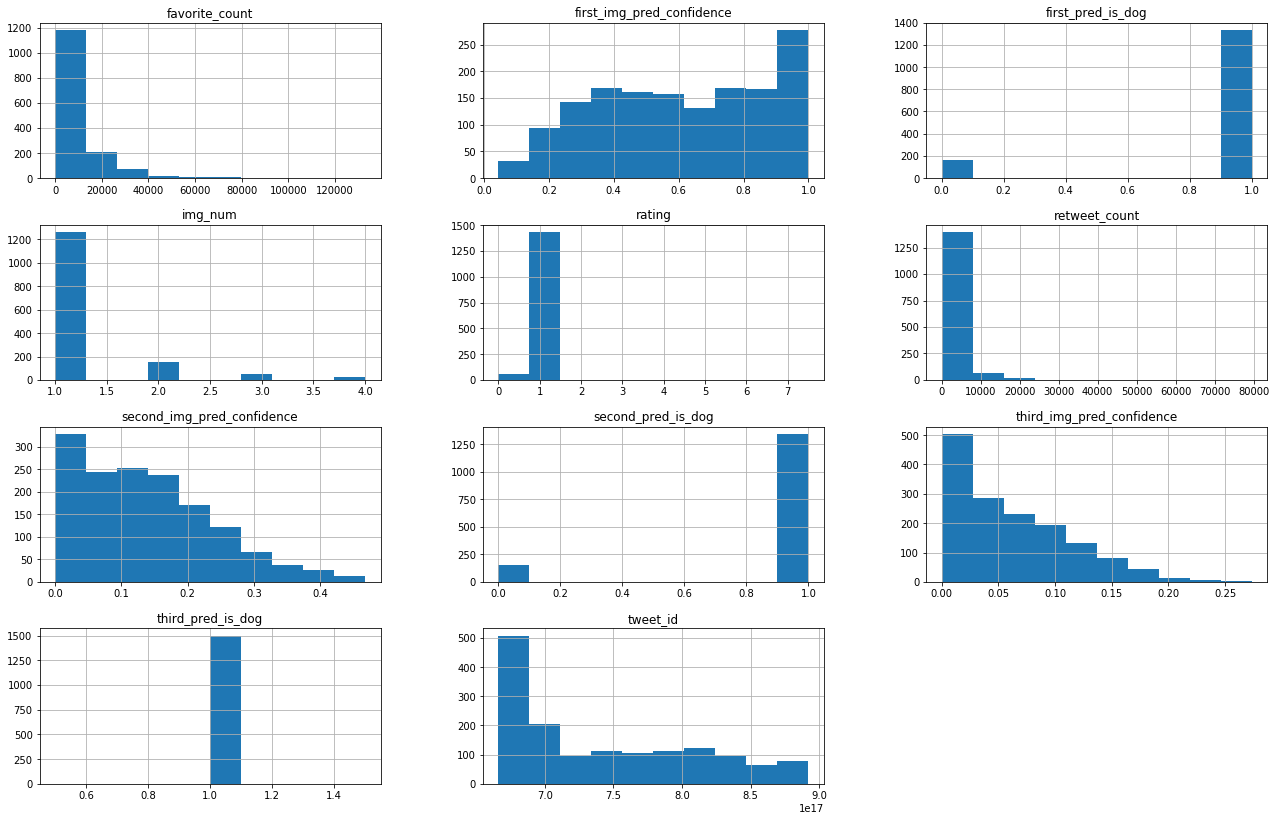

In [58]:
twitter_archive_master.hist(figsize=(22, 14));

#### Breed Predictions

In [110]:
twitter_archive_master.first_pred_is_dog.value_counts()

True     1333
False     165
Name: first_pred_is_dog, dtype: int64

In [119]:
twitter_archive_master.first_pred_is_dog.value_counts()[1]


In [60]:
twitter_archive_master.second_pred_is_dog.value_counts()

True     1343
False     155
Name: second_pred_is_dog, dtype: int64

In [61]:
twitter_archive_master.third_pred_is_dog.value_counts()

True    1498
Name: third_pred_is_dog, dtype: int64

There were total of three breed predictions. For the first prediction, there are 1333 dogs and 165 non-dogs, 1343 dogs and 155 non-dogs for the second prediction, the 1498 dogs and 0 non-dogs for the third prediction. 

#### Dog(s) with the highest rating and retweet_count

In [90]:
twitter_archive_master['rating'].describe()

count    1498.000000
mean        1.096627
std         0.257855
min         0.000000
25%         1.000000
50%         1.100000
75%         1.200000
max         7.500000
Name: rating, dtype: float64

In [89]:
twitter_archive_master[twitter_archive_master['rating'] == 7.5]

,tweet_id,timestamp,source,text,expanded_urls,name,rating,jpg_url,img_num,first_img_pred,first_img_pred_confidence,first_pred_is_dog,second_img_pred,second_img_pred_confidence,second_pred_is_dog,third_img_pred,third_img_pred_confidence,third_pred_is_dog,favorite_count,retweet_count
437,786709082849828864,2016-10-13 23:23:56,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,Logan,7.5,https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg,1,pomeranian,0.467321,True,persian_cat,0.122978,False,chow,0.102654,True,20296,7069


The dog with the highest rating is Logan.

In [99]:
twitter_archive_master['retweet_count'].max()

79515

In [100]:
twitter_archive_master.query('retweet_count == 79515')

,tweet_id,timestamp,source,text,expanded_urls,name,rating,jpg_url,img_num,first_img_pred,first_img_pred_confidence,first_pred_is_dog,second_img_pred,second_img_pred_confidence,second_pred_is_dog,third_img_pred,third_img_pred_confidence,third_pred_is_dog,favorite_count,retweet_count
649,744234799360020481,2016-06-18 18:26:18,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,None,1.3,https://pbs.twimg.com/ext_tw_video_thumb/74423...,1,labrador_retriever,0.825333,True,ice_bear,0.044681,False,whippet,0.018442,True,131075,79515


The dog which has the highest retweet_count has no name as it is None. 

### Insights:
1. There were total of three breed predictions. For the first prediction, there are 1333 dogs and 165 non-dogs, 1343 dogs and      155 non-dogs for the second prediction, the 1498 dogs and 0 non-dogs for the third prediction. 

2. The dog with the highest rating is Logan, with a tweet_id of '786709082849828864'

3. The dog which has the highest retweet_count has no name as it is None.

### Visualization

#### Relationships between ratings, favoutite_count and retweet_count

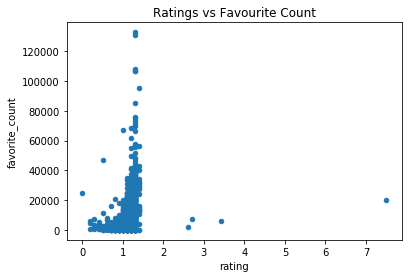

In [106]:
# Relationships between rating and favorite_count
twitter_archive_master.plot(x='rating', y='favorite_count', kind='scatter', title='Ratings vs Favourite Count');

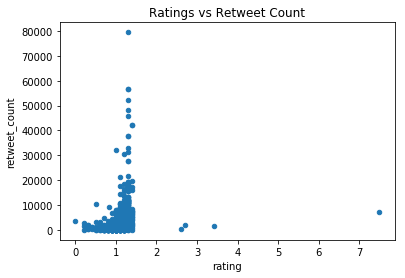

In [107]:
# Relationships between rating and retweet_count
twitter_archive_master.plot(x='rating', y='retweet_count', kind='scatter', title='Ratings vs Retweet Count');

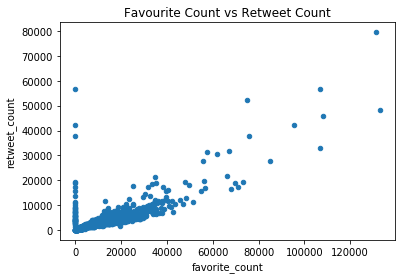

In [108]:
# Relationships between favorite_count and retweet_count
twitter_archive_master.plot(x='favorite_count', y='retweet_count', kind='scatter', title='Favourite Count vs Retweet Count');

##### favourite_count and retweet_count have a strong positive relationship with each other but  each one has a weak relationship with rating.  